In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Phase 1

## A

In [2]:
# ORIGENAL
img = cv2.imread('car.jpg')
img_resized = cv2.resize(img , (500,500) , interpolation=cv2.INTER_CUBIC) # resize (soursr, (x,y)  ,for the qulity and math 

cv2.imshow('image' , img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

## B

In [3]:
# greyscale 
# import image 
img = cv2.imread('car.jpg')
# resize image 
img_resized = cv2.resize(img , (500,500) , interpolation=cv2.INTER_CUBIC) # resize (soursr, (x,y)  ,for the qulity and math 
# make the image in grayscale 
img_grey = cv2.cv2tColor(img_resized , cv2.COLOR_BGR2GRAY) # cvtColor is an converter for image 

cv2.imshow('image' , img_grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'cv2tColor'

# Phase 2

## A

In [ ]:
capture = cv2.VideoCapture(0)
while True:
    isTrue ,fream = capture.read()

    cv2.imshow('camera', fream )
    if cv2.waitKey(20) & 0xFF == ord('x'):
        break 
capture.release()
cv.destroyAllWindows()


## B

In [30]:
def Canny_detector(img, weak_th=None, strong_th=None):
    

    # Convert to grayscale
    img_resized = cv2.resize(img , (500,500) , interpolation=cv2.INTER_CUBIC) # resize (soursr, (x,y)  ,for the qulity and math 
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    # Compute gradients
    gx = cv2.Sobel(np.float32(gray), cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(np.float32(gray), cv2.CV_64F, 0, 1, ksize=3)
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Thresholds
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.1
    if strong_th is None:
        strong_th = mag_max * 0.5

    height, width = gray.shape

    # Non-maximum suppression
    for i_x in range(1, width - 1):
        for i_y in range(1, height - 1):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang - 180) if abs(grad_ang) > 180 else abs(grad_ang)

            if grad_ang <= 22.5 or grad_ang > 157.5:
                neighb_1 = mag[i_y, i_x - 1]
                neighb_2 = mag[i_y, i_x + 1]
            elif grad_ang <= 67.5:
                neighb_1 = mag[i_y - 1, i_x - 1]
                neighb_2 = mag[i_y + 1, i_x + 1]
            elif grad_ang <= 112.5:
                neighb_1 = mag[i_y - 1, i_x]
                neighb_2 = mag[i_y + 1, i_x]
            else:
                neighb_1 = mag[i_y + 1, i_x - 1]
                neighb_2 = mag[i_y - 1, i_x + 1]

            if mag[i_y, i_x] < neighb_1 or mag[i_y, i_x] < neighb_2:
                mag[i_y, i_x] = 0

    # Edge classification
    ids = np.zeros_like(gray, dtype=np.uint8)
    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y, i_x]
            if grad_mag < weak_th:
                mag[i_y, i_x] = 0
            elif strong_th > grad_mag >= weak_th:
                ids[i_y, i_x] = 1  # weak edge
            else:
                ids[i_y, i_x] = 2  # strong edge

    return mag, ids


In [31]:
frame = cv2.imread('car.jpg')
if frame is None:
    print("Error: image not found! Please check the path.")

In [32]:
canny_img = Canny_detector(frame)

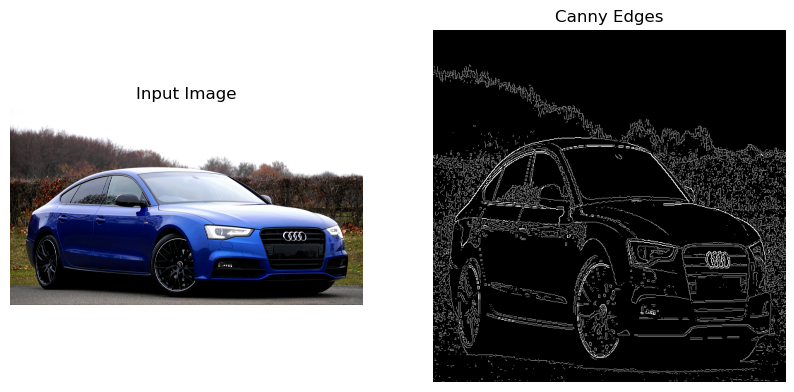

In [36]:
mag, ids = canny_img  
plt.figure(figsize=(10, 5))

# Canny Edges show 
plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(ids, cmap='gray')
plt.axis('off')
# original photo show
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
